In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [23]:
# read the data
df = pd.read_csv('./sim_2024-01-26_10-46-01_scanning.csv')

In [24]:
# access patterns
access_patterns = [
    "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=63.0_accessDensity=1.56_randomJampRatio_0.pkl",
    "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl",
    "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=50.0_accessDensity=21.88_randomJampRatio_10.pkl",
    "./request_maker/request_files/numReqs=64_recycleRatio=1.56_maxdistance=29.0_accessDensity=54.69_randomJampRatio_25.pkl",
    "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=24.0_accessDensity=62.5_randomJampRatio_50.pkl",
]

In [48]:
latency_y_max = 1.3
HitCountsmax = 70
UserReqmax = 1.0

rotangle = 30
figure_size = (20,5)
detail_fig_size = (12,6)
fontSize = 13

### scanningに対する評価

#### RandomJumpratio = 0の時の評価

[[array([0.0422]), array([0.118]), array([0.012]), array([0.1308])], [array([0.0392]), array([0.1198]), array([0.012]), array([0.1303])], [array([0.0705]), array([0.14]), array([0.0358]), array([0.13])], [array([0.0392]), array([0.1416]), array([0.0283]), array([0.1205])], [array([0.0425]), array([0.151]), array([0.0225]), array([0.1059])], [array([0.0404]), array([0.1386]), array([0.0213]), array([0.1084])], [array([0.0958]), array([0.1678]), array([0.0436]), array([0.1056])], [array([0.0712]), array([0.1205]), array([0.0486]), array([0.1054])], [array([0.0426]), array([0.1197]), array([0.0109]), array([0.1316])], [array([0.0405]), array([0.1212]), array([0.0111]), array([0.1276])], [array([0.0485]), array([0.1638]), array([0.0317]), array([0.1321])], [array([0.0821]), array([0.1465]), array([0.0206]), array([0.1172])], [array([0.0676]), array([0.1179]), array([0.0158]), array([0.1436])], [array([0.042]), array([0.1548]), array([0.021]), array([0.1163])], [array([0.0891]), array([0.16

/tmp/ipykernel_152548/1536270988.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


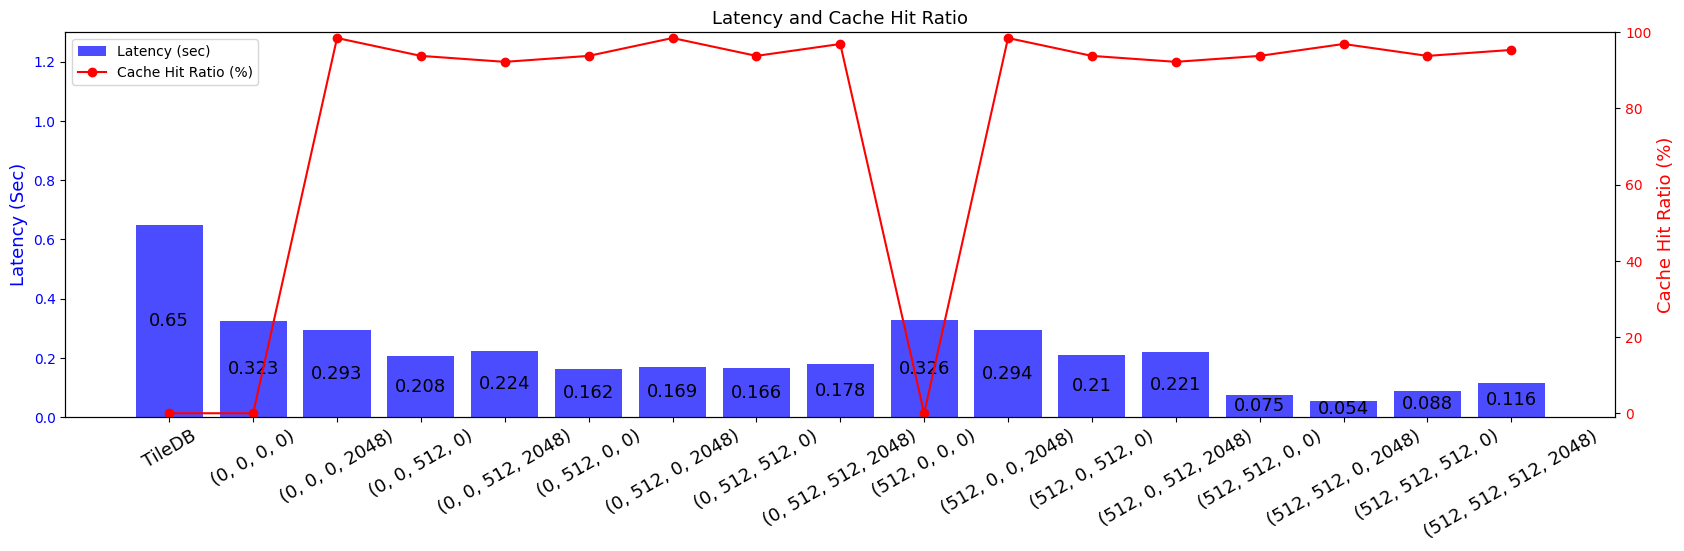

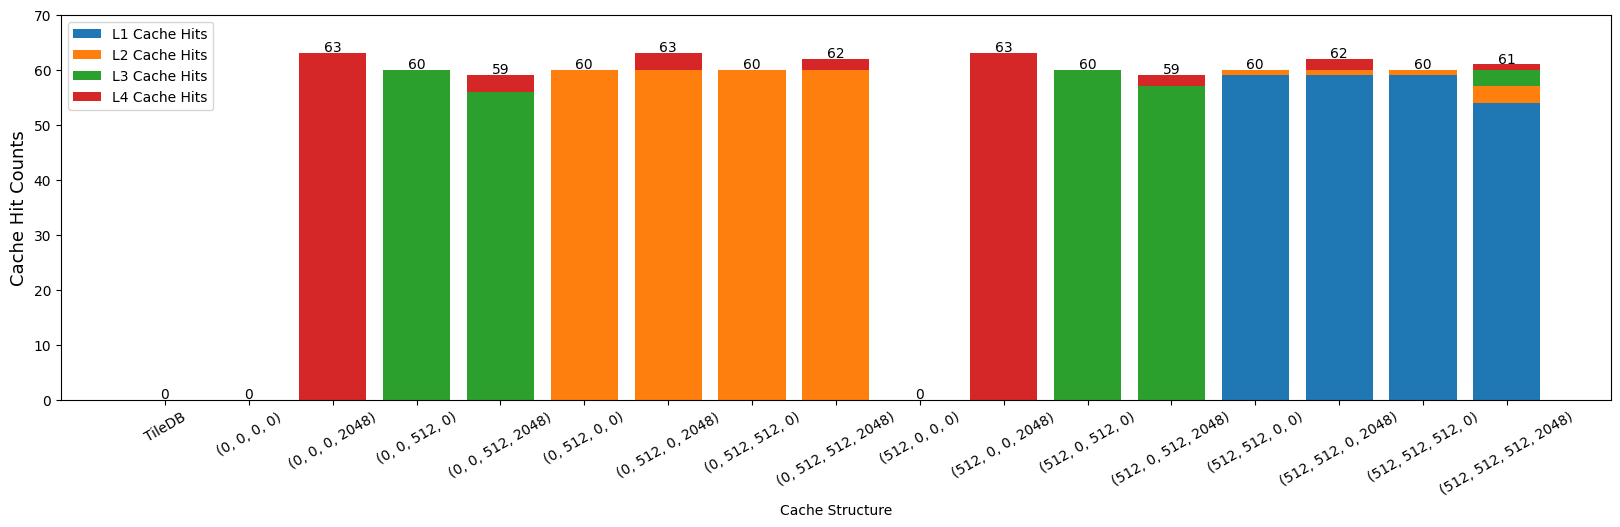

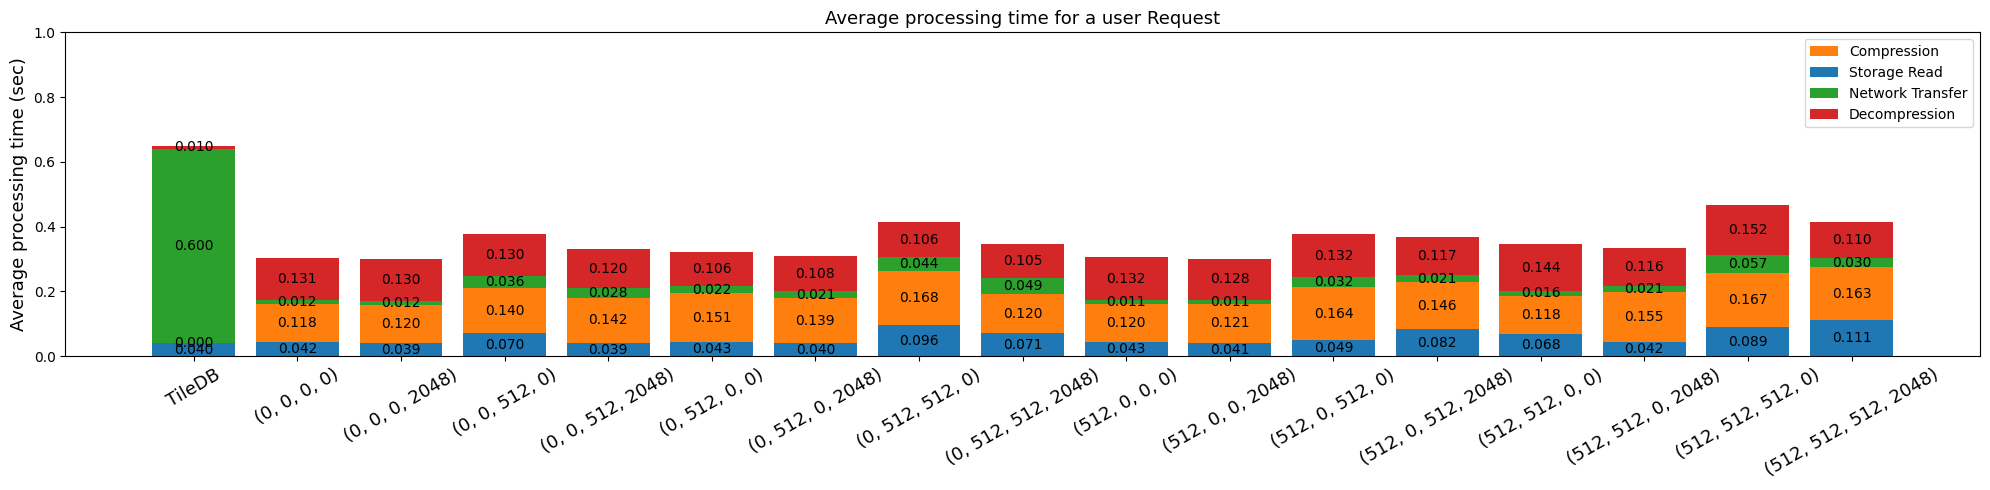

In [50]:
# 固定する変数
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=63.0_accessDensity=1.56_randomJampRatio_0.pkl"
nReqs = 64
jumpRatio = 0


df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


##### latency and cache hit ratio to multiple archtectures #####
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)


file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")
ax.set_ylim(0,UserReqmax)

file_name = f"Scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)





#### RandomJumpratio = 5%の時の評価

[[array([0.0484]), array([0.1172]), array([0.0103]), array([0.1317])], [array([0.054]), array([0.1137]), array([0.0106]), array([0.1294])], [array([0.0502]), array([0.1773]), array([0.0129]), array([0.1156])], [array([0.0808]), array([0.1747]), array([0.0137]), array([0.1128])], [array([0.0512]), array([0.1638]), array([0.0226]), array([0.1085])], [array([0.0468]), array([0.1531]), array([0.0332]), array([0.1083])], [array([0.0808]), array([0.2111]), array([0.0476]), array([0.1093])], [array([0.1027]), array([0.2061]), array([0.0523]), array([0.1067])], [array([0.0434]), array([0.1212]), array([0.0092]), array([0.13])], [array([0.0644]), array([0.1134]), array([0.0097]), array([0.132])], [array([0.0502]), array([0.1735]), array([0.0154]), array([0.1194])], [array([0.0782]), array([0.1847]), array([0.0155]), array([0.1293])], [array([0.064]), array([0.162]), array([0.0363]), array([0.1327])], [array([0.0729]), array([0.1514]), array([0.0223]), array([0.1242])], [array([0.0824]), array([

/tmp/ipykernel_152548/1820900074.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


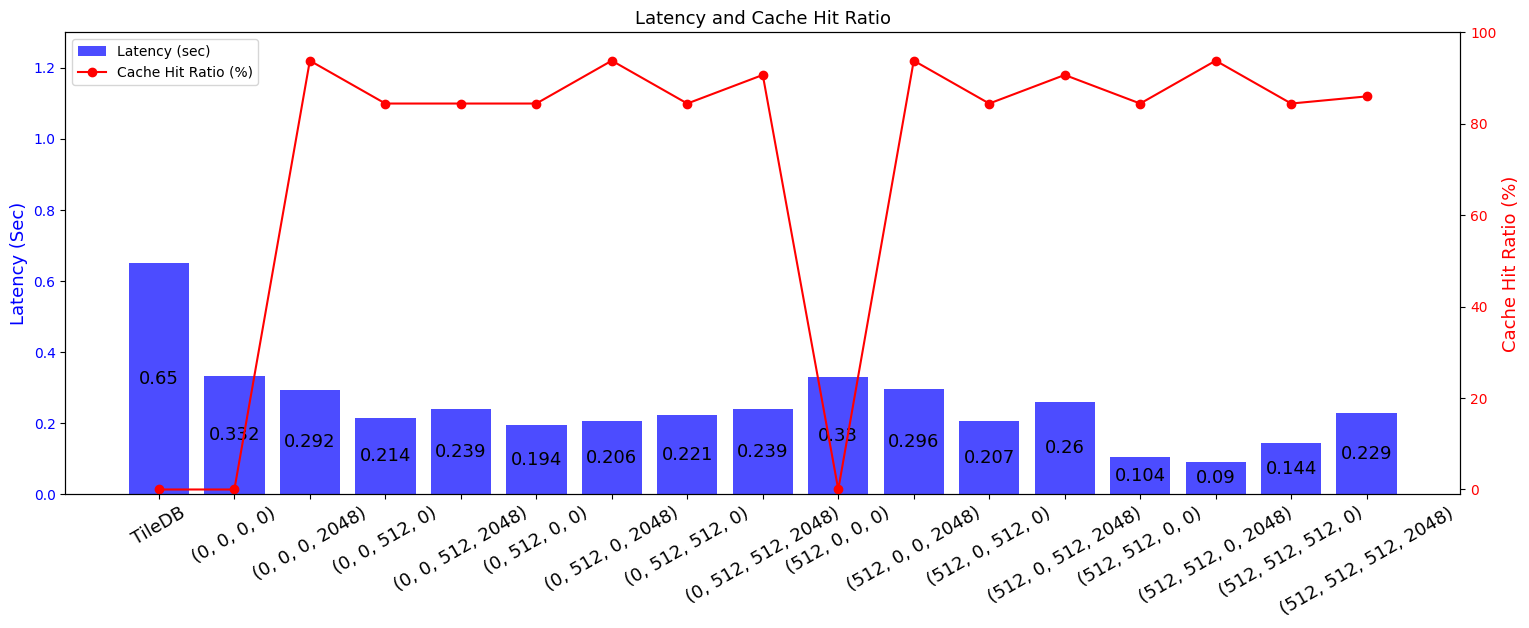

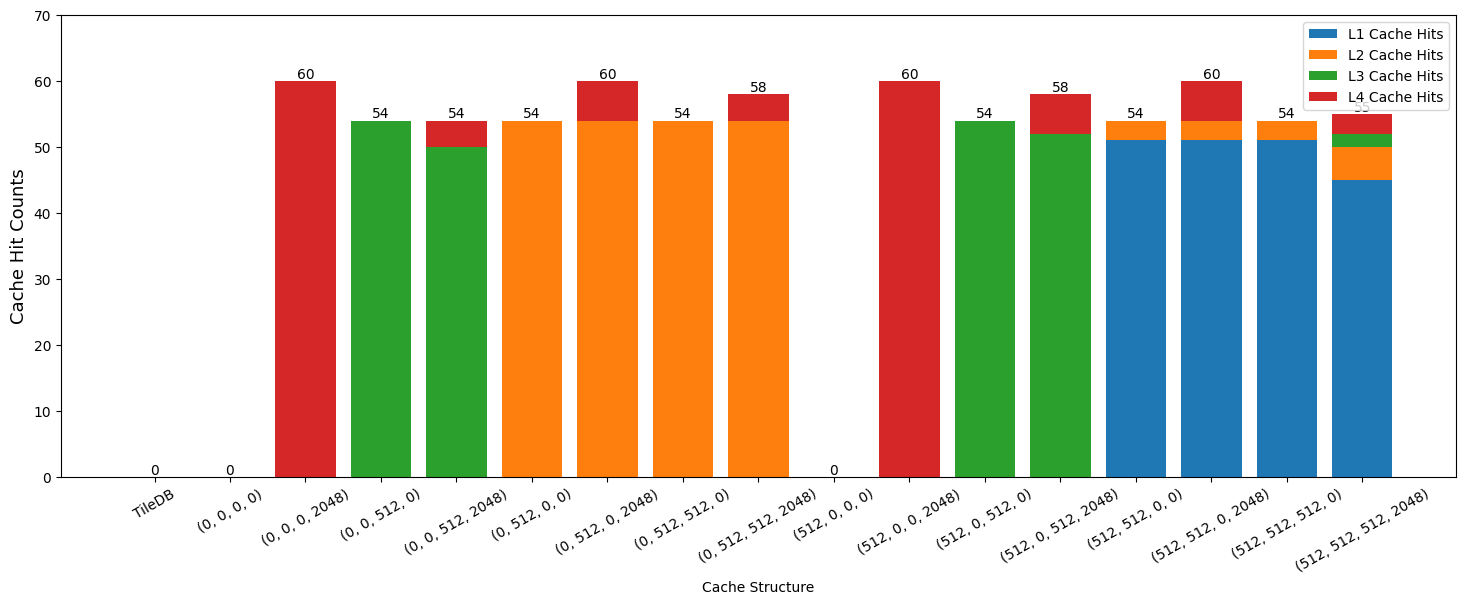

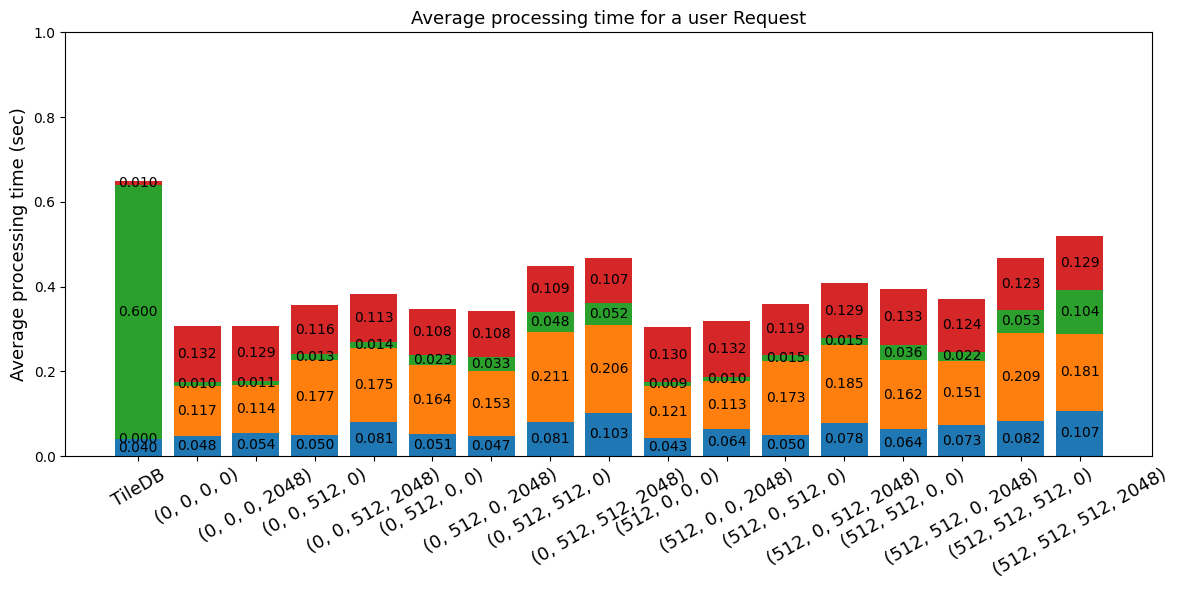

In [44]:
# 固定する変数
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl"
nReqs = 64
jumpRatio = 5


df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)

##### latency and cache hit ratio to multiple archtectures #####

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)


ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)

# Save the figure
file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)




#############　キャッシュヒットの内訳 ################

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()
ax.set_ylim(0,HitCountsmax)



file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################


# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.set_ylim(0,UserReqmax)

file_name = f"Scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



##### RandomJumpRatio = 10の時の評価

[[array([0.0433]), array([0.1166]), array([0.0078]), array([0.12])], [array([0.0611]), array([0.1161]), array([0.0089]), array([0.1196])], [array([0.0666]), array([0.1698]), array([0.0202]), array([0.1289])], [array([0.0927]), array([0.1591]), array([0.0222]), array([0.1265])], [array([0.0726]), array([0.1536]), array([0.0221]), array([0.1106])], [array([0.0734]), array([0.1546]), array([0.0302]), array([0.1079])], [array([0.1267]), array([0.1683]), array([0.0513]), array([0.1116])], [array([0.1011]), array([0.2295]), array([0.0562]), array([0.1131])], [array([0.048]), array([0.1173]), array([0.0067]), array([0.1251])], [array([0.061]), array([0.1164]), array([0.008]), array([0.1175])], [array([0.0888]), array([0.1582]), array([0.013]), array([0.1281])], [array([0.0928]), array([0.153]), array([0.0174]), array([0.1274])], [array([0.0639]), array([0.1716]), array([0.0361]), array([0.1311])], [array([0.0824]), array([0.148]), array([0.0245]), array([0.1236])], [array([0.1207]), array([0.

/tmp/ipykernel_152548/3071241516.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


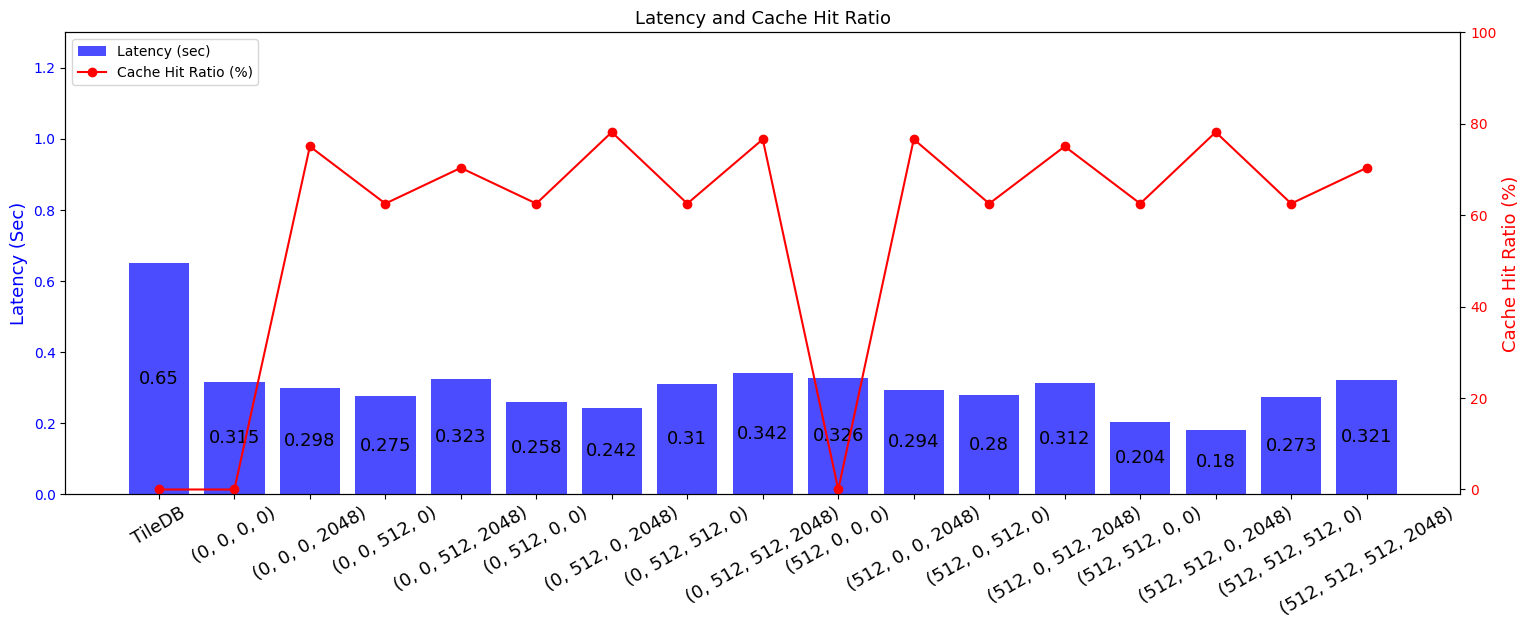

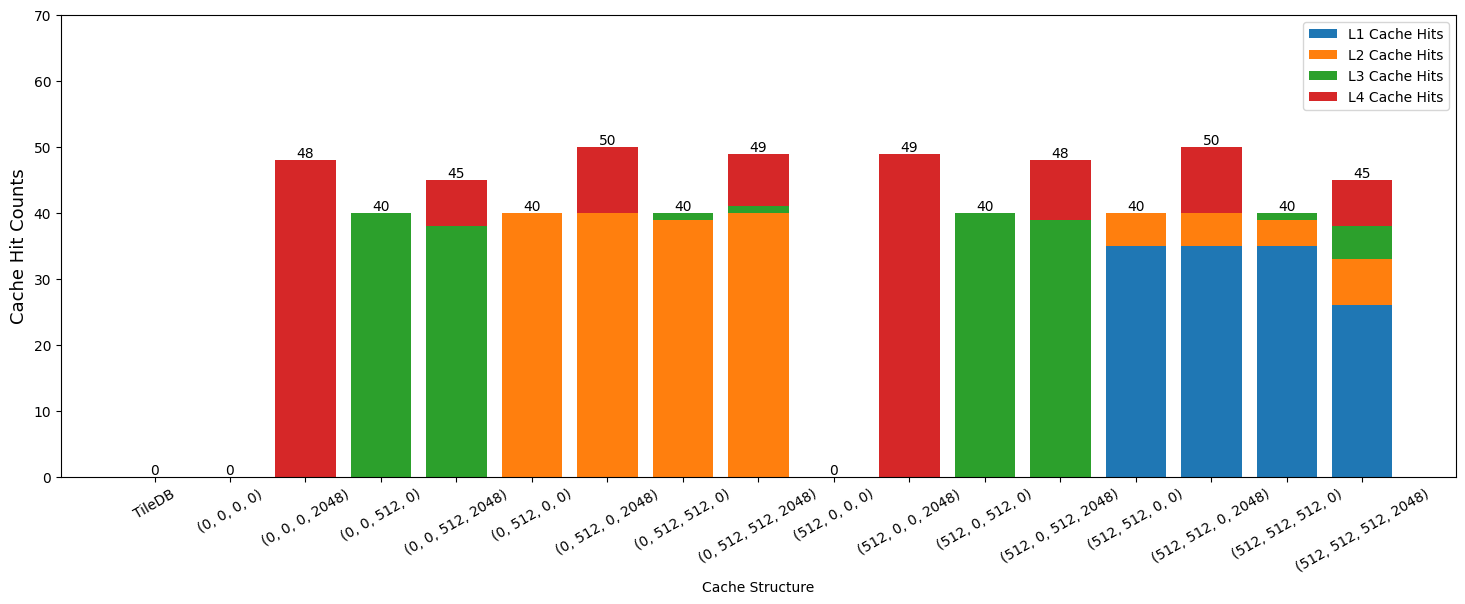

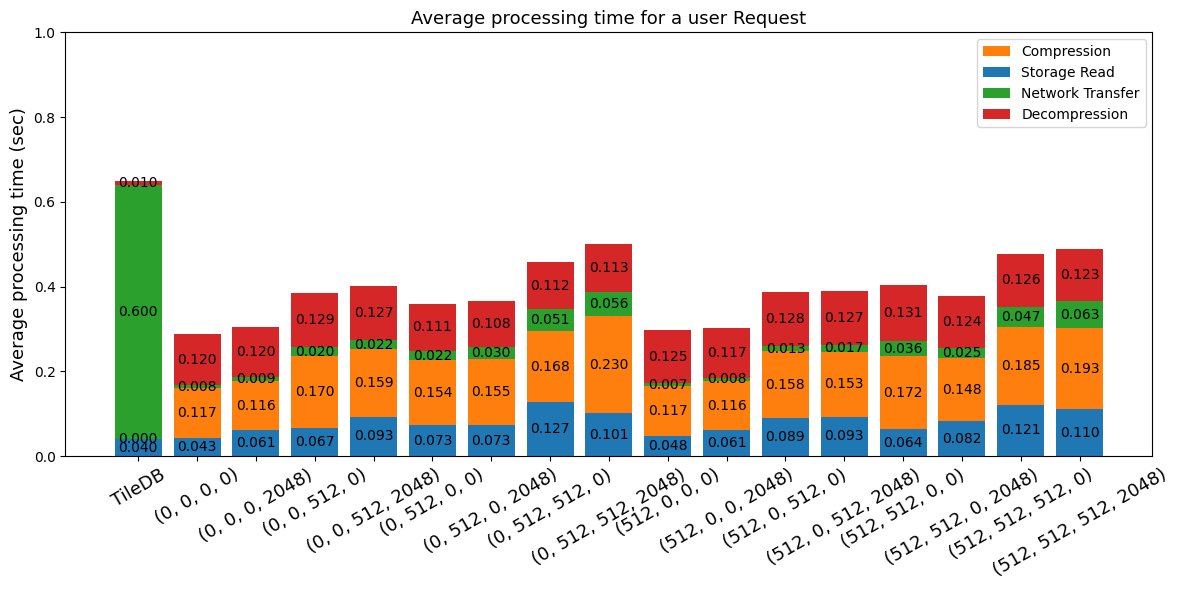

In [45]:
# 固定する変数
jumpRatio = 10
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=50.0_accessDensity=21.88_randomJampRatio_10.pkl"
nReqs = 64



df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]


##### latency and cache hit ratio to multiple archtectures #####

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)


# Save the figure
file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()

ax.set_ylim(0,HitCountsmax)



file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")


ax.set_ylim(0,UserReqmax)

file_name = f"Scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



#### Jumpratio = 25の時

[[array([0.0444]), array([0.1179]), array([0.0106]), array([0.1274])], [array([0.0563]), array([0.1168]), array([0.0133]), array([0.1118])], [array([0.0787]), array([0.1713]), array([0.0189]), array([0.1204])], [array([0.081]), array([0.183]), array([0.0194]), array([0.13])], [array([0.044]), array([0.1732]), array([0.0309]), array([0.118])], [array([0.0673]), array([0.1583]), array([0.0366]), array([0.1169])], [array([0.0967]), array([0.1831]), array([0.0399]), array([0.1171])], [array([0.0913]), array([0.2005]), array([0.0624]), array([0.1209])], [array([0.041]), array([0.1196]), array([0.0197]), array([0.1314])], [array([0.0527]), array([0.1227]), array([0.0226]), array([0.1312])], [array([0.0694]), array([0.1729]), array([0.0252]), array([0.1121])], [array([0.078]), array([0.1687]), array([0.0303]), array([0.1251])], [array([0.0575]), array([0.1612]), array([0.0522]), array([0.1358])], [array([0.0614]), array([0.167]), array([0.0535]), array([0.1321])], [array([0.0958]), array([0.2

/tmp/ipykernel_152548/716461194.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


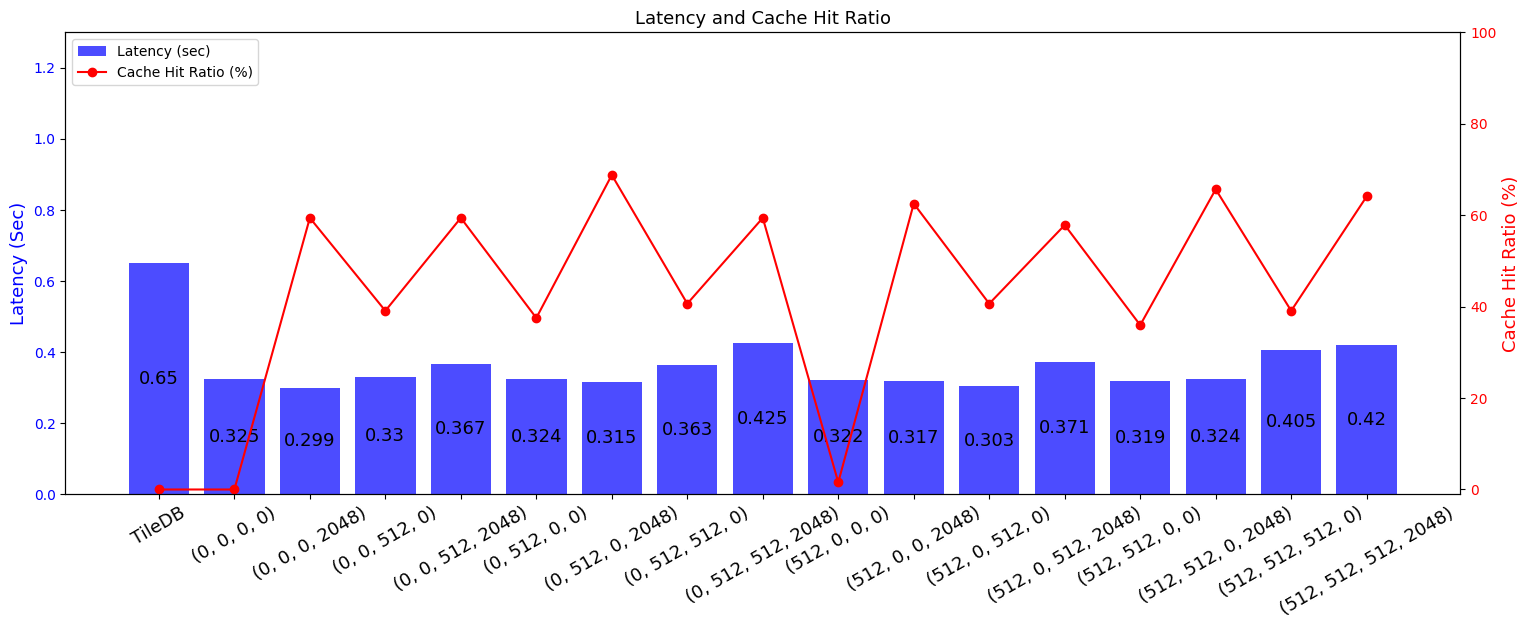

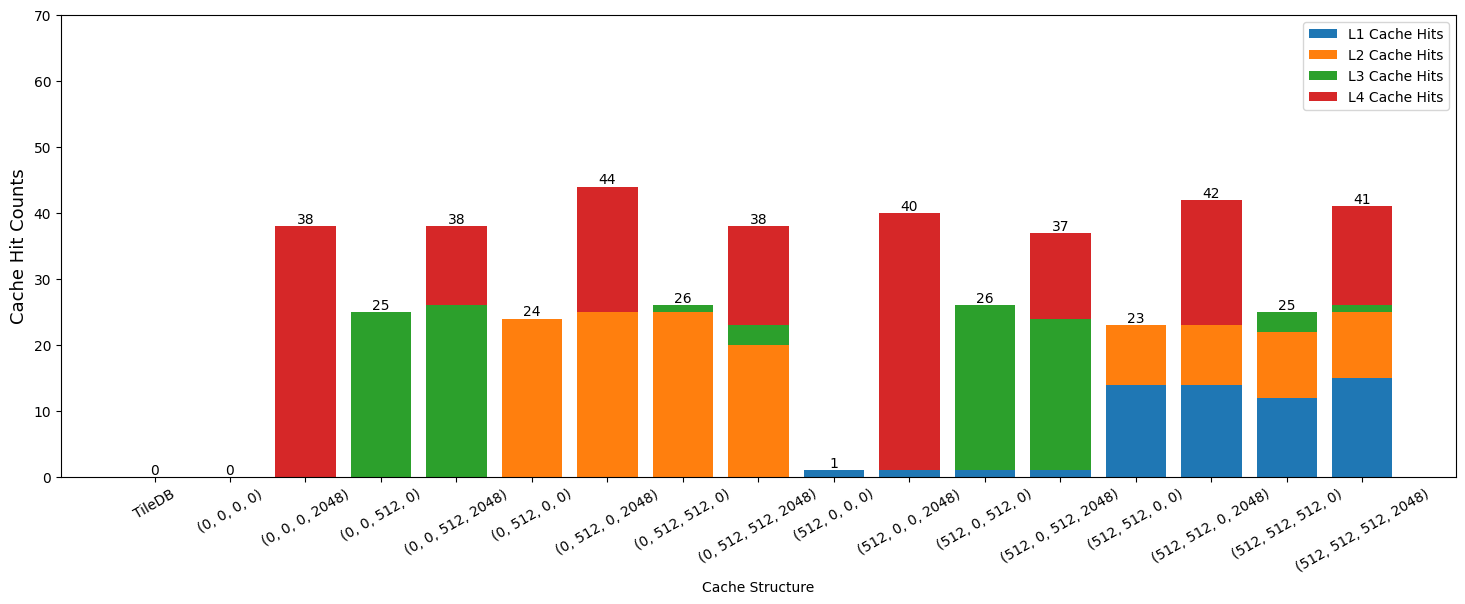

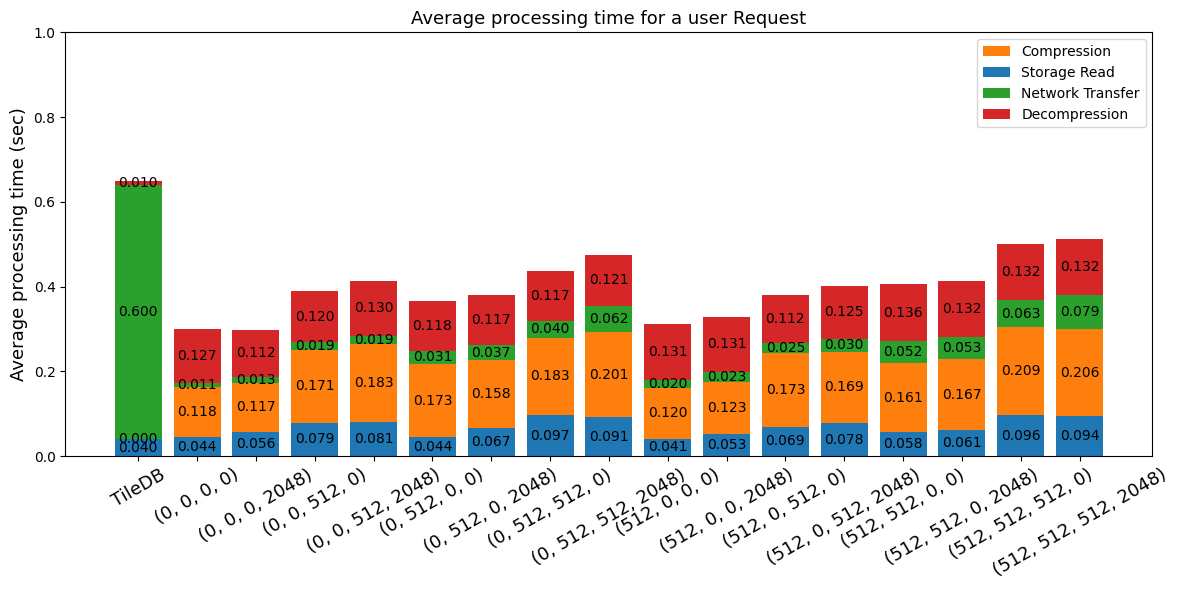

In [46]:
# 固定する変数
jumpRatio = 25
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=1.56_maxdistance=29.0_accessDensity=54.69_randomJampRatio_25.pkl"
nReqs = 64



df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

##### latency and cache hit ratio to multiple archtectures #####


# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)

# Save the figure
file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()

ax.set_ylim(0,HitCountsmax)



file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")

ax.set_ylim(0,UserReqmax)

file_name = f"Scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



#### jumpRatio 50の時

[[array([0.0465]), array([0.1181]), array([0.0241]), array([0.1316])], [array([0.0553]), array([0.1196]), array([0.0263]), array([0.1147])], [array([0.076]), array([0.16]), array([0.0279]), array([0.1124])], [array([0.0927]), array([0.1648]), array([0.0444]), array([0.1251])], [array([0.0558]), array([0.169]), array([0.041]), array([0.1203])], [array([0.0742]), array([0.1552]), array([0.0461]), array([0.1199])], [array([0.1099]), array([0.1715]), array([0.0525]), array([0.1214])], [array([0.1108]), array([0.1835]), array([0.065]), array([0.1182])], [array([0.0458]), array([0.1173]), array([0.0264]), array([0.1254])], [array([0.055]), array([0.1182]), array([0.0287]), array([0.1235])], [array([0.0721]), array([0.1623]), array([0.0311]), array([0.1303])], [array([0.081]), array([0.1794]), array([0.0335]), array([0.1262])], [array([0.057]), array([0.168]), array([0.0578]), array([0.1324])], [array([0.0846]), array([0.1506]), array([0.0604]), array([0.1272])], [array([0.1134]), array([0.19

/tmp/ipykernel_152548/2734108891.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)


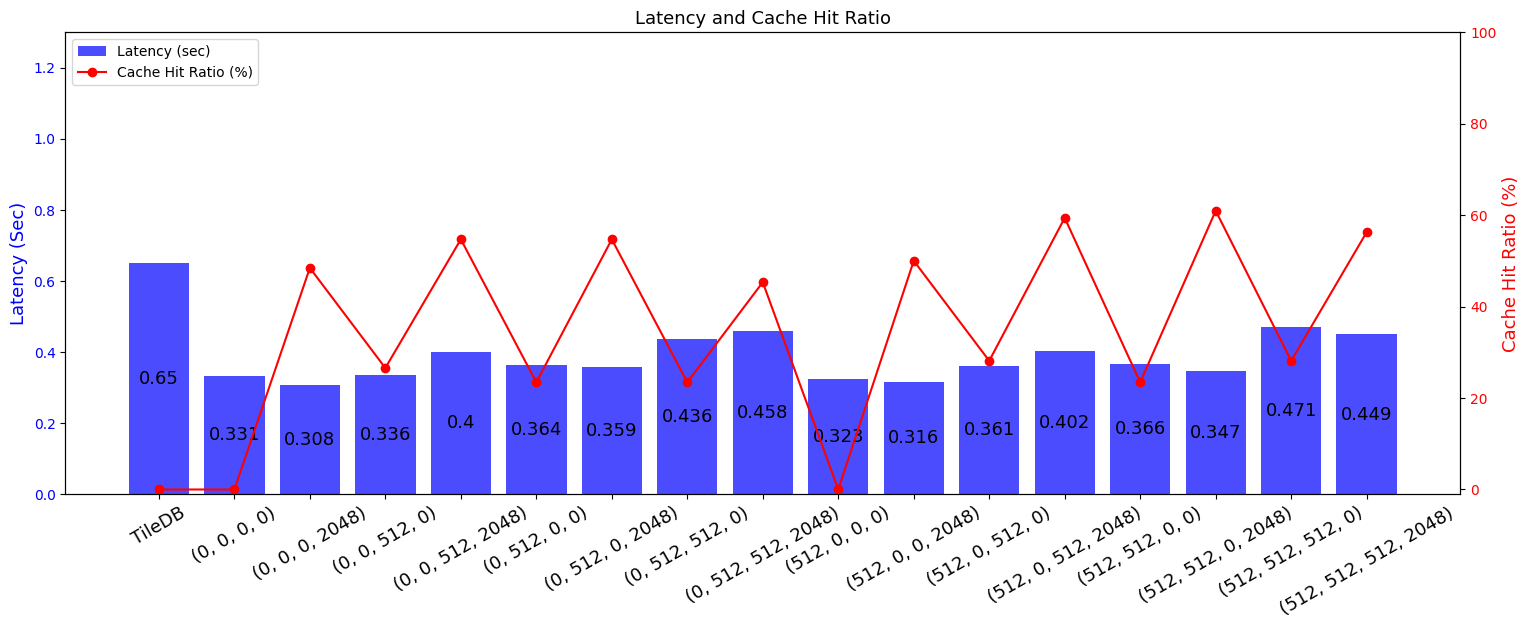

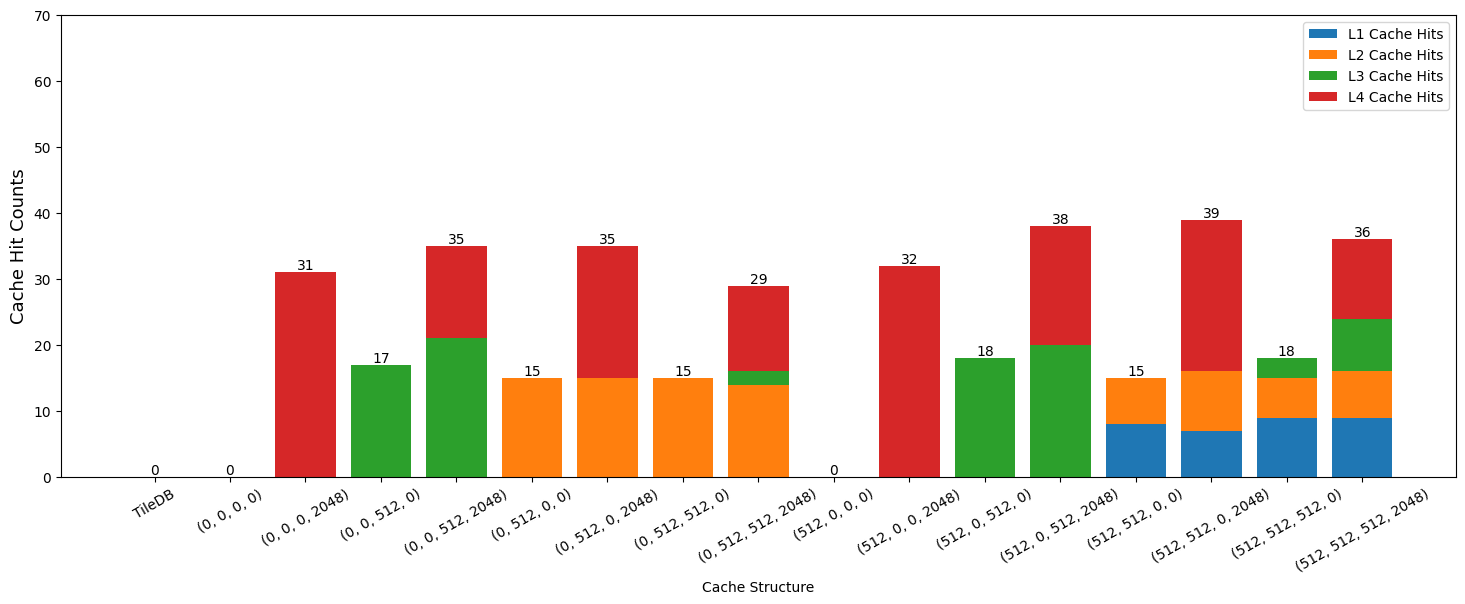

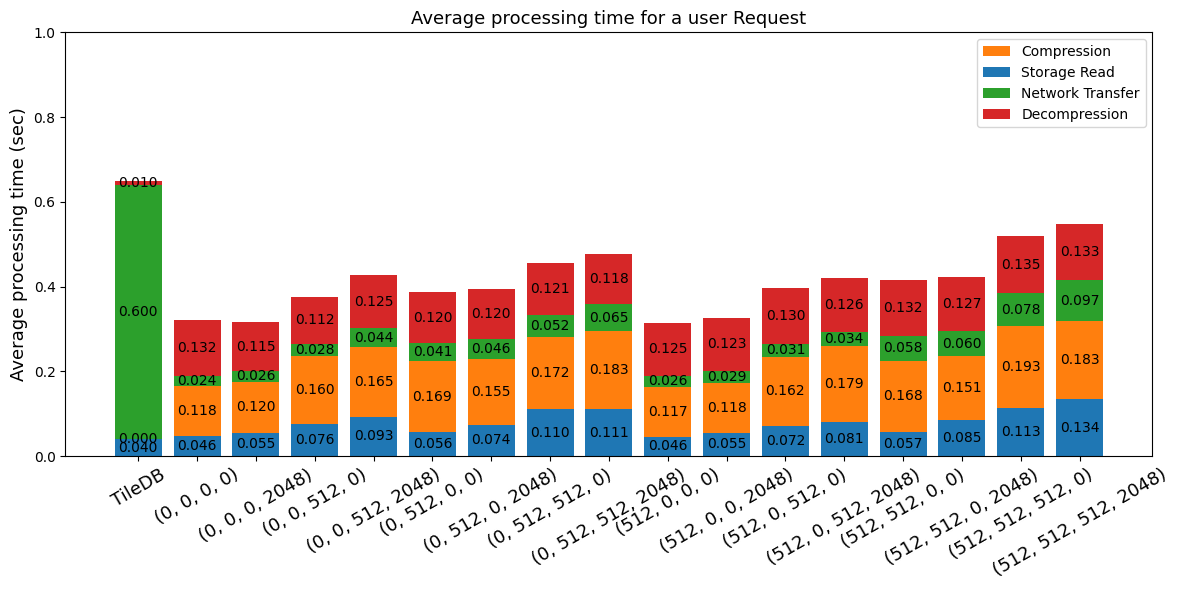

In [47]:
# 固定する変数
jumpRatio = 50
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=24.0_accessDensity=62.5_randomJampRatio_50.pkl"
nReqs = 64



df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]


hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]


##### latency and cache hit ratio to multiple archtectures #####

# Sample data
categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
# ax1.set_xlabel("Cache Structure", fontsize=fontSize)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value / 2,
             str(round(value, 3)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)

# Save the figure
file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)



#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red' ]


for i in range(len(hanrei)):
    ax.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i])
    ax.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i])
    ax.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i])
    ax.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i])
    
    total = l1_hits[i] + l2_hits[i] + l3_hits[i] + l4_hits[i]
    
    # Add count label on top of each bar
    ax.annotate(f"{total}", (hanrei[i], total + 1), ha='center', va='center', fontsize=10)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1,color = colors[0])
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2,color = colors[1])
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3,color = colors[2])
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4,color = colors[3])

# Label the axes and add a title
plt.xlabel("Cache Structure")
plt.ylabel("Cache Hit Counts",fontsize=fontSize)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=10)

# Add a legend
ax.legend()

ax.set_ylim(0,HitCountsmax)



file_name = f"scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"

# Show the chart
fig.savefig(file_name, bbox_inches='tight',format="png",dpi=300)


################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=detail_fig_size)

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")

ax.set_ylim(0,UserReqmax)

file_name = f"Scanning_{jumpRatio}_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



/tmp/ipykernel_206804/1873037821.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=rotangle, fontsize=15)


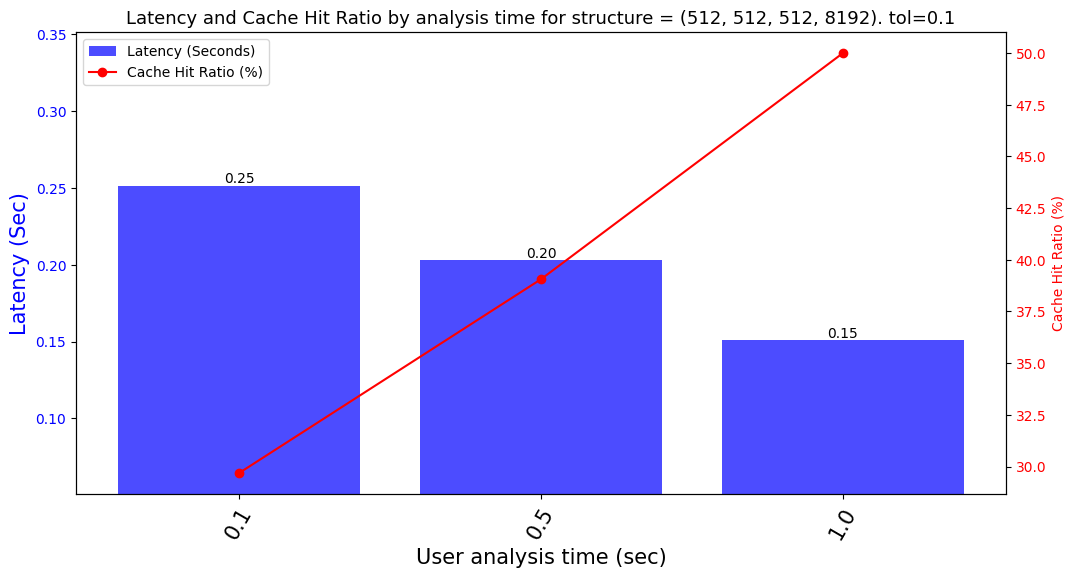

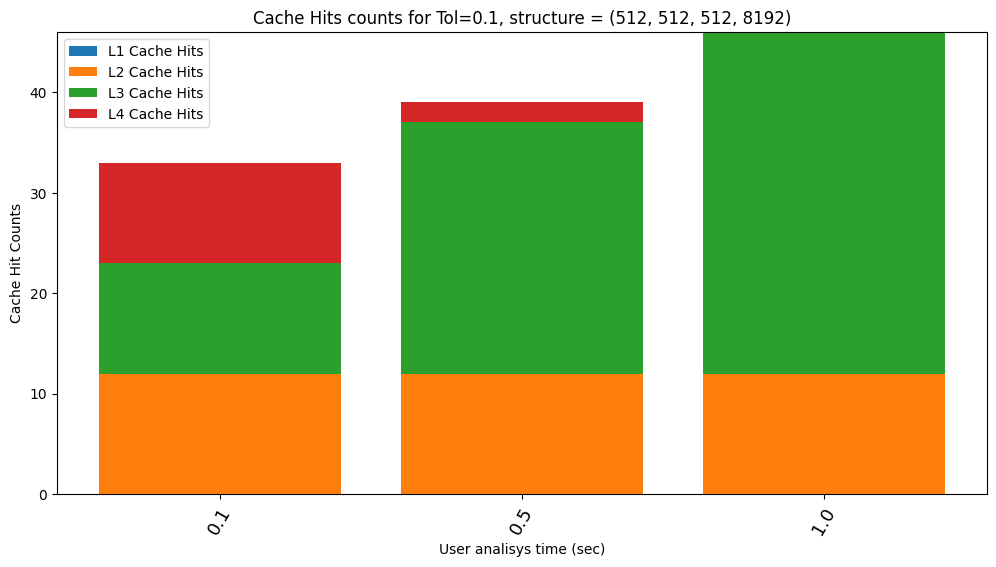

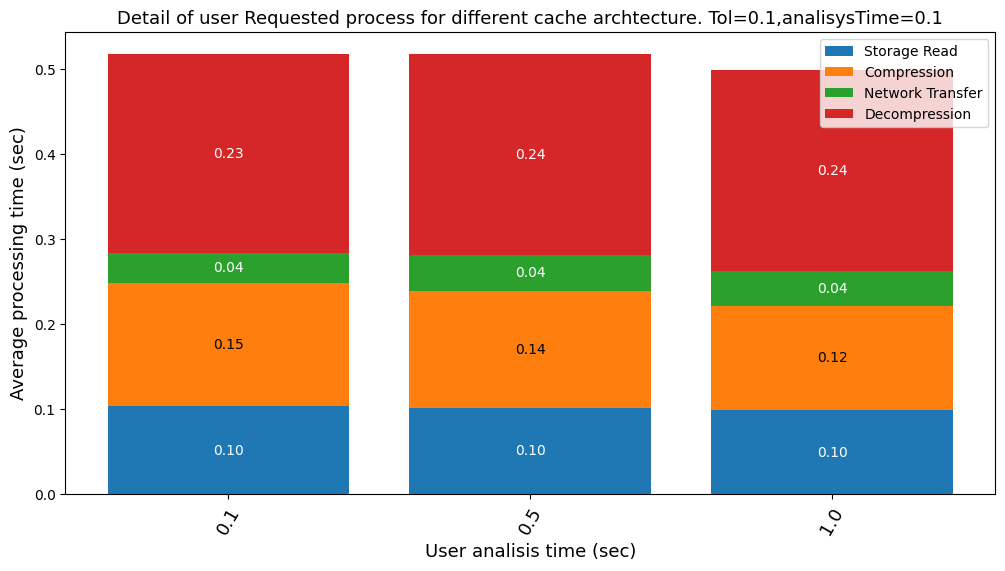

In [25]:
import matplotlib.pyplot as plt
import numpy as np

UserAnalTimes = [0.1, 0.5, 1.0]

# 固定する変数
tol = 0.1
accessPattern = None
nReqs = 64

# 例えば、L1=Off,L2=Off,L3=off,L4の変化を見たいとき
L1size = 512
L2size = 512
L3size = 512
L4size = 2048*4

cacheStruct = f"{L1size}_{L2size}_{L3size}_{L4size}"

df_arch = df[(df["tol"] == 0.1) & (df["nReqs"] == nReqs)]
df_arch = df_arch.drop(["nReqs", "reqPatrn", "blkSize"], axis=1)

latency = []
AllMissTime = []
HitUchiwake = []
UserReqLatUchiwake = []

for UseranalTime in UserAnalTimes:
    one_row = df_arch[(df_arch["anlTime"] == UseranalTime) & (df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
    latency.append(one_row["AvrLat"].values)
    AllMissTime.append(one_row["nAllMis"].values)  # nL1Hits, nL2Hits, nL3Hits, nL4Hits, nAllMis
    HitUchiwake.append([one_row["nL1Hits"].values, one_row["nL2Hits"].values, one_row["nL3Hits"].values, one_row["nL4Hits"].values])
    UserReqLatUchiwake.append([one_row["storageAvg"].values, one_row["compAvg"].values, one_row["networkAvg"].values, one_row["decompAvg"].values])

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]


# rotation angle
rotangle = 60

# Sample data
UserAnalTimes = [str(uanal) for uanal in UserAnalTimes]
categories = UserAnalTimes
values = latency
cacheHitRatio = [HitTime / nReqs * 100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bars = ax1.bar(categories, latency, color='b', alpha=0.7, label='Latency (Seconds)')

# Label the first y-axis
ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
ax2.plot(categories, cacheHitRatio, color='r', marker='o', label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Cache Hit Ratio (%)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Add a title
plt.title(f"Latency and Cache Hit Ratio by analysis time for structure = ({L1size}, {L2size}, {L3size}, {L4size}). tol={tol}", fontsize=13)

# Set x-axis tick labels rotation and font size
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=15)

# Increase font size for x-axis labels
ax1.set_xlabel("User analysis time (sec)", fontsize=15)
ax1.set_ylabel("Latency (Sec)", color='b', fontsize=15)

# Limit the y-axis between 0.3 and 0.5
ax1.set_ylim(min(latency) - 0.1, max(latency) + 0.1)

# Add numbers on top of the bars
for bar, value in zip(bars, latency):
    ax1.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')

# Save the figure
file_name = f"CacheStruct={cacheStruct}_tol={tol}_analTIme={UserAnal}.png"
plt.savefig(file_name)

# Show the plot
plt.show()
ax1.set_ylim(0,latency_y_max)
ax2.set_ylim(-1,100)

#### cache hitの内訳 ####
#############　キャッシュヒットの内訳 ################
# キャッシュヒットの内訳テスト
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = UserAnalTimes
uchiwake = HitUchiwake

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Plot the stacked bars
ax.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1)
ax.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2)
ax.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3)
ax.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4)

# Label the axes and add a title
plt.xlabel("User analisys time (sec)")
plt.ylabel("Cache Hit Counts")
plt.title(f"Cache Hits counts for Tol={tol}, structure = ({L1size}, {L2size}, {L3size}, {L4size})")

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend
ax.legend()


file_name = f"CacheStruct={cacheStruct}_tol={tol}_analTIme={UserAnal}_cachehitDetail.png"

# Show the chart
plt.savefig(file_name)


############# ユーザのリクエストの各処理にかかった時間 ##################
################ ユーザのリクエストに対する各プロセスの平均処理時間の内訳 ################



import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = UserAnalTimes
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax.annotate(f'{storage_read[i]:.2f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='white')

    ax.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax.annotate(f'{compression[i]:.2f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax.annotate(f'{network_latency[i]:.2f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='white')

    ax.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax.annotate(f'{decompression[i]:.2f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='white')

# Label the axes and add a titl3
plt.xlabel("User analisis time (sec)",fontsize=13)
plt.ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Detail of user Requested process for different cache archtecture. Tol={tol},analisysTime={UserAnal}",fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=rotangle,fontsize=13)

# Add a legend with only four labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper right")


file_name = f"CacheStruct={cacheStruct}_tol={tol}_analTIme={UserAnal}_eachProc.png"

# Show the chart
plt.savefig(file_name)

In [ ]:
# TODO
# tolを変化させたときの3セットをお願いします！！はーい！！！